# Install Packages

In [17]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install jsonpickle
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install emoji
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install googletrans
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install jsonpickle
!{sys.executable} -m pip install pandas

# Import Libraries

In [18]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
import csv
import json
import datetime
from datetime import datetime
import jsonpickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
from textblob import TextBlob
from bs4 import BeautifulSoup
import re
import string
from googletrans import Translator
import emoji
from collections import Counter
from io import BytesIO

# MONGODB host setup and Twitter authentication :

In [ ]:
MONGO_HOST = 'mongodb://localhost/mydb'

In [20]:
twitter_cred = dict()


In [21]:
twitter_cred['CONSUMER KEY'] = 'UPeI5WvTfpJPBUBxmk0pqJv0p'
twitter_cred['CONSUMER_SECRET'] = 'VtRNMpaYVU36Ztfiu5wU4Yk7qBu1r5h4Gi1jaZAD21fA1UYB9Q'
twitter_cred['ACCESS KEY'] = '1175127666577592323-oVohjZ7E6cdIePo4G7zP3SDvIDktWj'
twitter_cred['ACCESS_SECRET'] = 'XHfu50AydSPWE9MRCpznNC0HkoFKIiZmSzmw51PoOrikS'

In [22]:
with open('twitter_credentials.json','w') as secret_info:
    json.dump(twitter_cred, secret_info, indent = 4, sort_keys= True)

In [23]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    print(info)
    consumer_key = info["CONSUMER KEY"]
    consumer_secret = info["CONSUMER_SECRET"]
    access_key = info["ACCESS KEY"]
    access_secret = info["ACCESS_SECRET"]

{'ACCESS KEY': '1175127666577592323-oVohjZ7E6cdIePo4G7zP3SDvIDktWj', 'ACCESS_SECRET': 'XHfu50AydSPWE9MRCpznNC0HkoFKIiZmSzmw51PoOrikS', 'CONSUMER KEY': 'UPeI5WvTfpJPBUBxmk0pqJv0p', 'CONSUMER_SECRET': 'VtRNMpaYVU36Ztfiu5wU4Yk7qBu1r5h4Gi1jaZAD21fA1UYB9Q'}


In [24]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_key,access_secret)
api = tweepy.API(auth)

# Streamline live tweets

In [20]:
class MyListener(StreamListener):

    def on_data(self, data):
        try:
            client=MongoClient(MONGO_HOST)
            db = client.twitterdb
            datajson = json.loads(data)
            created_at = datajson['created_at']
            print("tweet collected at"+ str(created_at))
            db.twitter_search.insert(datajson)
            #with open('race.json', 'a') as f:
                #f.write(data)
            return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

    def on_error(self, status):
        print(status)
        return True

twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#Pochettino'])
    

   
    
   

# Analysis of Data Collection System

In [25]:
client = MongoClient(MONGO_HOST)
db = client.mydb
collection = db.updated

tweets_data = []
count = 0

for dat in collection.find():
    if dat.get('created_at'):
        tweets_data.append(dat.get("created_at"))

print(tweets_data[0])

Mon Oct 21 22:54:56 +0000 2019


# Conversion of date and time of tweets to python Datetime format

In [26]:
dt = []
from datetime import datetime
for i in tweets_data:
    d = datetime.strptime(i,'%a %b %d %H:%M:%S %z %Y')
    dt.append(d.strftime('%Y-%m-%d'))

print(dt[0])

2019-10-21


# Plot of Data Collection

          date   count
0   2019-10-21     159
1   2019-10-22   39938
2   2019-10-23   88330
3   2019-10-24   47313
4   2019-10-25   13593
5   2019-10-26    7428
6   2019-10-27    8360
7   2019-10-28    1670
8   2019-10-29     738
9   2019-11-08    2699
10  2019-11-09   27220
11  2019-11-10  247699
12  2019-11-11    8959
13  2019-11-19   16362
14  2019-11-20     295


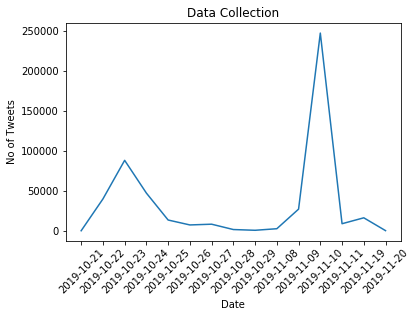

In [27]:
X,Y = np.unique(dt, return_counts=True)
dataset = pd.DataFrame({'date': X, 'count': list(Y)}, columns=['date', 'count'])
dataset.sort_values(by=['date'])
print(dataset)
plt.plot(dataset['date'],dataset['count'])
plt.xticks(rotation=45)
plt.title('Data Collection')
plt.xlabel('Date')
plt.ylabel('No of Tweets')

plt.show()

# Analysis of popularity of EPL in other countries by extracting the language field of tweets

<class 'pymongo.collection.Collection'>
<class 'pymongo.command_cursor.CommandCursor'>
{'_id': 'en', 'count': 150913}
{'_id': 'es', 'count': 14077}
{'_id': 'und', 'count': 12255}
{'_id': 'pt', 'count': 8130}
{'_id': 'tr', 'count': 6213}
{'_id': 'it', 'count': 5128}
{'_id': 'fr', 'count': 4911}
{'_id': 'in', 'count': 3034}
{'_id': 'ar', 'count': 2389}
{'_id': 'de', 'count': 2253}
{'_id': 'ja', 'count': 1775}
{'_id': 'nl', 'count': 1196}
{'_id': 'ca', 'count': 849}
{'_id': 'tl', 'count': 689}
{'_id': 'ht', 'count': 547}
{'_id': 'fi', 'count': 539}
{'_id': 'ro', 'count': 473}
{'_id': 'ru', 'count': 417}
{'_id': 'th', 'count': 401}
{'_id': 'pl', 'count': 372}
{'_id': 'zh', 'count': 315}
{'_id': 'no', 'count': 247}
{'_id': 'el', 'count': 179}
{'_id': 'et', 'count': 177}
{'_id': 'sv', 'count': 172}
{'_id': 'da', 'count': 141}
{'_id': 'cs', 'count': 115}
{'_id': 'lt', 'count': 90}
{'_id': 'ko', 'count': 75}
{'_id': 'cy', 'count': 70}
{'_id': 'hu', 'count': 66}
{'_id': 'sl', 'count': 65}
{'_id

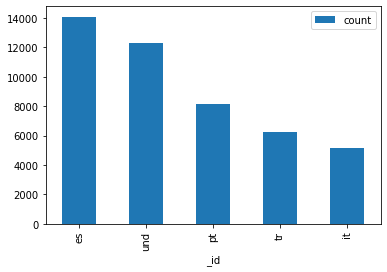

In [28]:
client = MongoClient(MONGO_HOST)
db = client.mydb
#sam = db.tweets.find_one({'text'})
print(type(db.tweets))
data = db.tweets.aggregate(
[
{
    '$group':{
        #'$lang' : { '$sum':1}
        '_id': '$lang',
        "count": {'$sum':1}
    }},
    
    {"$sort": {
     #"count""
     "count":-1
    }}

])

print(type(data))
d = []
for i in data:
    print(i)
    d.append(i)
print(d)
df = pd.DataFrame(d)
dg = df[1:6]
print(dg)
dg.plot(kind='bar',x='_id',y='count')




# Analysis of popularity of EPL in other countries using the locations of users

In [29]:
client = MongoClient(MONGO_HOST)
db = client.mydb
print(type(db.tweets))
data = db.tweets.aggregate(
[
{
    '$group':{
        
        '_id': '$user.location',
        "count": {'$sum':1}
    }},
    
    {"$sort": {
     
     "count":-1
    }}

])
c = []
for i in data:
    c.append(i)
c1 = [x for x in c if x is not None]

df1 = pd.DataFrame(c1)
df1 = df1.dropna()

df1.columns = ['loc','count']

df2 = df1['loc'].apply(lambda x: pd.Series(x.split(',')))
df2 = df2.drop(df2.columns[[2,3,4,5,6]],axis=1)

df2['count'] = df1['count']

df2.columns = ['city','country','count']

print(df2.head())
"""Handling null values in country field and switching the city values to country values if country 
values are missing"""
null_idx = df2['country'].isnull()          
df2.loc[null_idx,'country'] = df2['city']
df2.loc[null_idx,'city'] = np.nan
print(df2.head())
print(df2.loc[df2['country']=='England'])


<class 'pymongo.collection.Collection'>
          city   country  count
1        Lagos   Nigeria   2244
2       London   England   1933
3      Nigeria       NaN   1608
4  Los Angeles        CA   1310
5      Nairobi     Kenya   1088
          city   country  count
1        Lagos   Nigeria   2244
2       London   England   1933
3          NaN   Nigeria   1608
4  Los Angeles        CA   1310
5      Nairobi     Kenya   1088
                city  country  count
89               NaN  England    157
746        Liverpool  England     23
4274          London  England      4
8725    North London  England      2
14548     Manchattan  England      1
30721      Cambridge  England      1
31894  Isle of wight  England      1
36896         london  England      1
39734         Durham  England      1


# Strip whitespace and plot the output

                  city  country  count
2               London  England   1933
21          Manchester  England    428
41           Liverpool  England    268
76     Stamford Bridge  England    180
89                 NaN  England    157
...                ...      ...    ...
41795          Wisbech  England      1
41817          Rushden  England      1
42055   Great Yarmouth  England      1
42058     West Sussex   England      1
42124          Hindley  England      1

[454 rows x 3 columns]
                           country  count
0                          Nigeria   6491
1                          England   5238
2                               CA   3813
3                              USA   3572
4                         Portugal   2395
...                            ...    ...
29325                On the toilet      1
29326  On the top of an Iroko tree      1
29327               On the world 🌎      1
29328        On top of my world...      1
29329                            🧠      1

[29

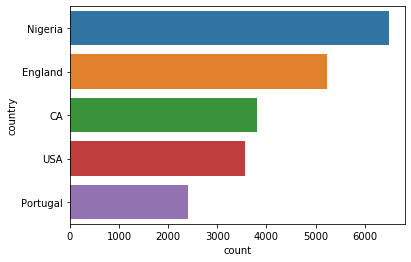

In [30]:
df2["country"] = df2["country"].str.strip()
print(df2.loc[df2['country']=='England'])
#print(df2.loc[df2['country']=='Nigeria'])
df3 = df2.groupby(['country'])['count'].sum()

df4 = df3.sort_values(ascending=False)
df4 = pd.DataFrame({'country':df4.index,'count':df4.values})
print(df4)
ax = sns.barplot(x='count',y='country',data = df4.head())

# Extract text and language fields of the tweets

In [31]:
client = MongoClient(MONGO_HOST)
db = client.mydb
collection = db.updated

from textblob import TextBlob
import re
textSentiment = []
language = []
for record in db.updated.find():
    if record.get('text'):
        textSentiment.append(record.get("text"))
    if record.get('lang'):
        language.append(record.get("lang"))
print(textSentiment[0])
print(language[1])

U guys suck! @LFC you can't beat the weakest @ManUtd team in history with the best team in your lame ass history😂😂😂… https://t.co/HZPrd9Ow89
en


In [32]:
print(len(textSentiment))

510763


# Drop tweets other than English

In [33]:
s = pd.DataFrame(textSentiment)
s['lang'] = language
s.columns = ['text','lang']
s.head()
r = s[s['lang']!='und']
r = r[r['lang']=='en']
r.shape

(370748, 2)

# Group hashtags

In [34]:
def get_hashtags(text):
    token_l = []
    emoticons_str = r'(?:[:=;][oO\-]?[D\)\]\(\]/\\OpP])'
    tokens_str = [emoticons_str, r'(?:@[\w_]+)', r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)',  # emoticons, @s, hash-tags
              r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # links
              r'(?:(?:\d+,?)+(?:\.?\d+)?)', r"(?:[a-z][a-z'\-_]+[a-z])",  # numbers, hyphenated words
              r'(?:[\w_]+)',  r'(?:\S)'] 
    tokens_re = re.compile(r'(' + '|'.join(tokens_str) + ')', re.IGNORECASE)
    tokens = tokens_re.findall(text)
    for t in tokens:
        token_l.append(t)
    tags = []
    for i in token_l:
        if i.startswith('#'):
            tags.append(i)
    return tags

# Plot of the most popular hashtag

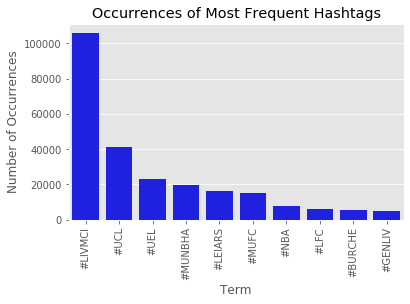

In [35]:
words = []
data = r['text']
for tweet in data:
    new_words = get_hashtags(tweet)
    words.extend(new_words)

counter = Counter()
counter.update(words)
df = pd.DataFrame(counter.most_common(10), columns=['Term', 'Number of Occurrences'])
plt.style.use('ggplot')
plot = sns.barplot(x='Term', y='Number of Occurrences', data=df, color='blue')
plot.set_title('Occurrences of Most Frequent Hashtags')
for label in plot.get_xticklabels():
    label.set_rotation(90)

plt.gcf().subplots_adjust(bottom=0.2)
plt.show()

# Removal of links,mentions,hashtags,whitespaces from the tweet text

In [36]:
#tweet.shape
#tweet.tail()
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
l = []
for t in r['text']:
    l.append(strip_all_entities(strip_links(t)))
    
print(l[0])


df = pd.DataFrame(l)
df.shape
#tweet['tweets'] = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet['tweets'], flags=re.MULTILINE)

U guys suck you can t beat the weakest team in history with the best team in your lame ass history😂😂😂…


(370748, 1)

# Removal of retweets

In [37]:
df.shape
df = df[~df[0].str.startswith('RT')]
df.head()
#trans = []
df[0] = df[0].str.strip()
df[0].iloc[0]
df.shape


(123688, 1)

# Change of tweets to lowercase

In [38]:
df[0] = df[0].str.lower()
df.head()
df.shape

(123688, 1)

# Removal of emojis

In [39]:
def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

In [40]:
e = []
for i in df[0]:
    e.append(give_emoji_free_text(i))

In [41]:
print(len(e))

123688


In [42]:
fl = pd.DataFrame(e)

In [43]:
print(fl.describe())
fl.head()

                                                        0
count                                              123688
unique                                             112449
top     live 2 0 liverpool vs manchester city live str...
freq                                                  132


,0
0,u guys suck you can t beat the weakest team in...
1,that s me
2,the happy one
3,you all should bow down to the great and almig...
4,let s talk about how sadio mane was pulling la...


# Filter for tweets with keyword

In [44]:
m = []
for i in fl[0]:
    
    if 'rodgers' in i:
        m.append(i)

m = pd.DataFrame(m)
print(m.shape)

(214, 1)


# Visualization of the sentiment for a particular player and manager

In [45]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
from nltk import tokenize
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

m['sentiment_compound_polarity']=m[0].apply(lambda x:sid.polarity_scores(x)['compound'])
m['sentiment_neutral']=m[0].apply(lambda x:sid.polarity_scores(x)['neu'])
m['sentiment_negative']=m[0].apply(lambda x:sid.polarity_scores(x)['neg'])
m['sentiment_pos']=m[0].apply(lambda x:sid.polarity_scores(x)['pos'])
m['sentiment_type']=''
m.loc[m.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
m.loc[m.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
m.loc[m.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
#m[m['sentiment_type']=='NEUTRAL']
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)  
m[0:20]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/PODS/apadman1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,0,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,facts espn does that with lbj zion mahomes rodgers all of em,0.0000,1.000,0.000,0.000,NEUTRAL
1,rodgers lakers are in conference finals bro if not nba this tweet,0.0000,1.000,0.000,0.000,NEUTRAL
2,rodgers not really its either lakers or clippers in the west gsw is question portland…,0.0000,1.000,0.000,0.000,NEUTRAL
3,you people will collect shege from rodgers i just need luiz sokratis niles and kolasinac to start a decent 4 …,0.0000,1.000,0.000,0.000,NEUTRAL
4,leicester are outstanding rodgers at his very best,0.8588,0.414,0.000,0.586,POSITIVE
5,no lies brendan rodgers is an amazing coach,-0.0516,0.362,0.362,0.275,NEGATIVE
6,review brendan rodgers is a better manager than unai emery,0.4404,0.734,0.000,0.266,POSITIVE
7,very very entertaining game this rodgers has leicester playing some lovely football and arsenal looking dangerou…,0.8431,0.589,0.000,0.411,POSITIVE
8,decent audition this by rodgers,0.0000,1.000,0.000,0.000,NEUTRAL
9,brendon rodgers football,0.0000,1.000,0.000,0.000,NEUTRAL


# Plot of reactions

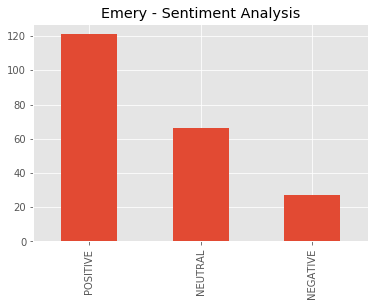

In [46]:
m.sentiment_type.value_counts().plot(kind='bar',title="Emery - Sentiment Analysis")

# Analysis of sentiment between clubs and managers using TextBlob

In [47]:
def get_polarity(s):
    return TextBlob(s).sentiment.polarity

In [48]:
fl['polarity'] = fl[0].apply(get_polarity)

In [49]:
fl = fl.loc[fl['polarity']!=0]
data_ar = fl[fl[0].str.contains('guardiola')]
data_liv = fl[fl[0].str.contains('rodgers')]
ars = data_ar['polarity'].values
liv = data_liv['polarity'].values

# Plot using TextBlob

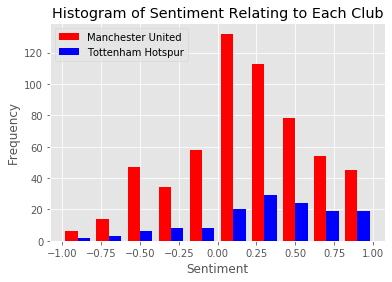

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([ars, liv], color=['red', 'blue'], label=['Manchester United', 'Tottenham Hotspur'])
ax.legend(loc='upper left')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sentiment Relating to Each Club')
plt.show()

# Analysis of Sentiment between Managers

In [51]:
a = data_ar['polarity']
l = data_liv['polarity']
ar_pos = a[a > 0].size
ar_neg = a[a < 0].size
liv_pos = l[l > 0].size
liv_neg = l[l < 0].size

print('Pep Guardiola:\n')
print('Positive tweets: ' + str(ar_pos))
print('Negative tweets: ' + str(ar_neg))
print('Percentage of tweets positive: ' + str(round((ar_pos/(ar_neg+ar_pos))*100, 1)) + '%\n')

print('Brendan Rodgers:\n')
print('Positive tweets: ' + str(liv_pos))
print('Negative tweets: ' + str(liv_neg))
print('Percentage of tweets positive: ' + str(round((liv_pos/(liv_neg+liv_pos))*100, 1)) + '%\n')

Pep Guardiola:

Positive tweets: 422
Negative tweets: 159
Percentage of tweets positive: 72.6%

Brendan Rodgers:

Positive tweets: 111
Negative tweets: 27
Percentage of tweets positive: 80.4%

